<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src = "https://github.com/Jangrae/img/blob/master/boston.png?raw=true" width=800></center>

# 실습 내용

- Grid Search로 Decision Tree 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- **medv: 본인 소유 주택가격(중앙값) (단위:$1,000) - Target**

In [4]:
# 기술통계 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(columns=target)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [6]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- Grid Search로 튜닝을 진행합니다.

# 4.모델링

- Grid Search로 튜닝을 진행합니다.

In [7]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

- 파라미터 범위를 딕셔너리로 선언합니다.

In [10]:
# 파라미터 선언
# max_depth: 1~50
dt = DecisionTreeRegressor(random_state=1)
param_grid = {
    'max_depth': range(1, 51)   # 1~50
}


- Grid Search 모델을 선언합니다.

In [11]:
# 선언하기
  # cv=5
  # scoring='r2'

model = GridSearchCV(estimator=dt,
                     param_grid=param_grid,
                     cv=5,            # 교차검증 5폴드
                     scoring='r2',    # <- 회귀 평가지표
                     n_jobs=-1)

- 모델 학습을 진행합니다.

In [12]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

- 학습 결과를 확인합니다.

In [13]:
# 학습 결과 확인

# 최적 파라미터
print("최적 파라미터:", model.best_params_)

# 최적 교차검증 점수
print("최적 교차검증 점수 (CV):", model.best_score_)

# 최적 모델
print("최적 모델:", model.best_estimator_)

# 테스트 데이터 점수 확인 (선택)
test_score = model.score(x_test, y_test)
print("테스트 데이터 점수:", test_score)


최적 파라미터: {'max_depth': 6}
최적 교차검증 점수 (CV): 0.7474883885080482
최적 모델: DecisionTreeRegressor(max_depth=6, random_state=1)
테스트 데이터 점수: 0.8477248406093285


- Decision Tree 모델 기반이므로 변수 중요도를 확인할 수 있습니다.
- model.best_estimator_.feature_importances_ 속성을 사용합니다.

    Feature  Importance
12    lstat    0.574317
5        rm    0.254570
7       dis    0.081037
4       nox    0.031899
10  ptratio    0.024968
0      crim    0.015752
9       tax    0.009472
6       age    0.002998
8       rad    0.002091
3      chas    0.001886
11    black    0.001012
1        zn    0.000000
2     indus    0.000000


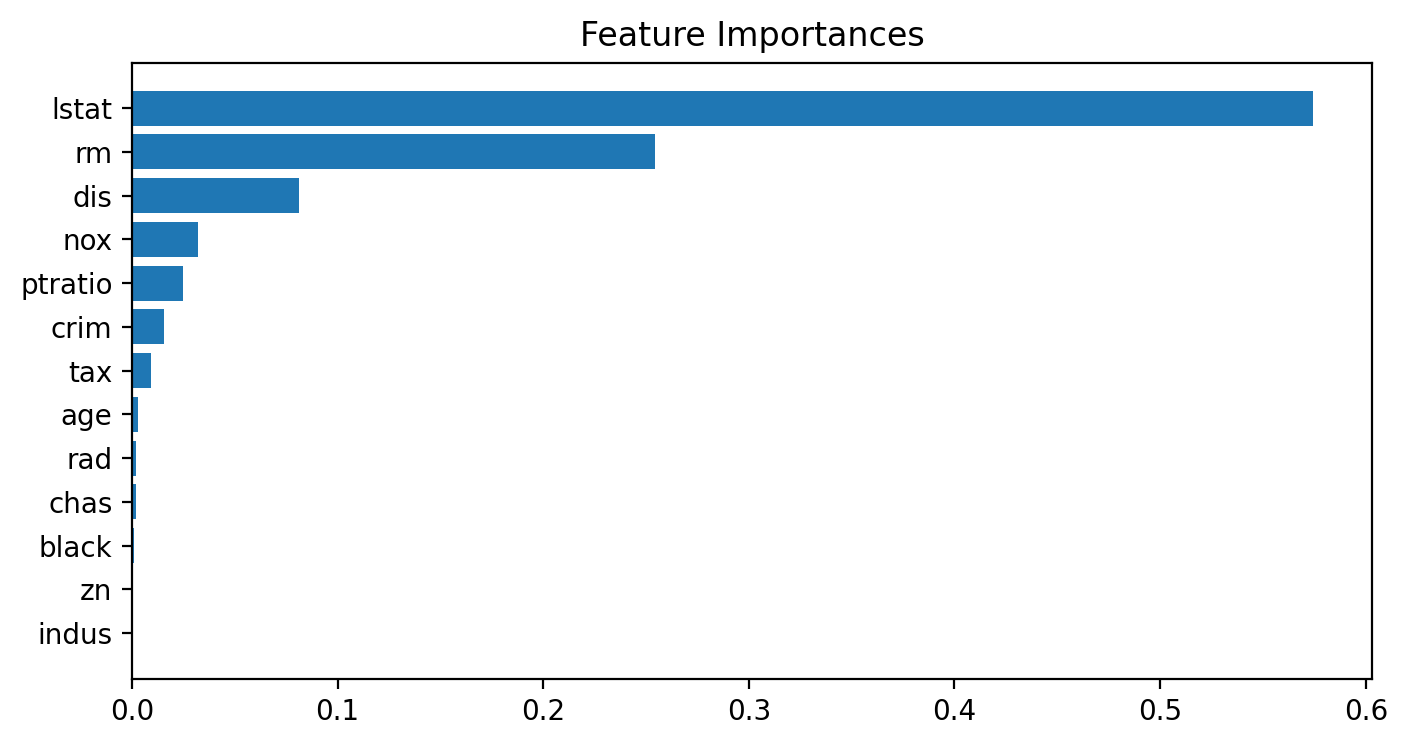

In [ ]:
# 변수 중요도
importances = model.best_estimator_.feature_importances_

# 변수명 + 중요도 DataFrame 생성
fi = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi)

# 시각화
plt.figure(figsize=(8, 4))
plt.barh(fi['Feature'], fi['Importance'])
plt.gca().invert_yaxis()  # 가장 중요한 변수가 위로 오도록
plt.title("Feature Importances")
plt.show()

# 5.성능 평가

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수는 없겠지요?

In [16]:
# 예측하기
y_pred = model.predict(x_test)

In [17]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.763239793643037
R2-Score: 0.8477248406093285
